In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

plt.style.use('fivethertyeight')

import warnings
warnings.filterwarnings('ignore')

OSError: 'fivethertyeight' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

exploring data 

In [6]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.duplicated().sum()


0

Data analysis and Visualization

In [10]:
data.corr() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

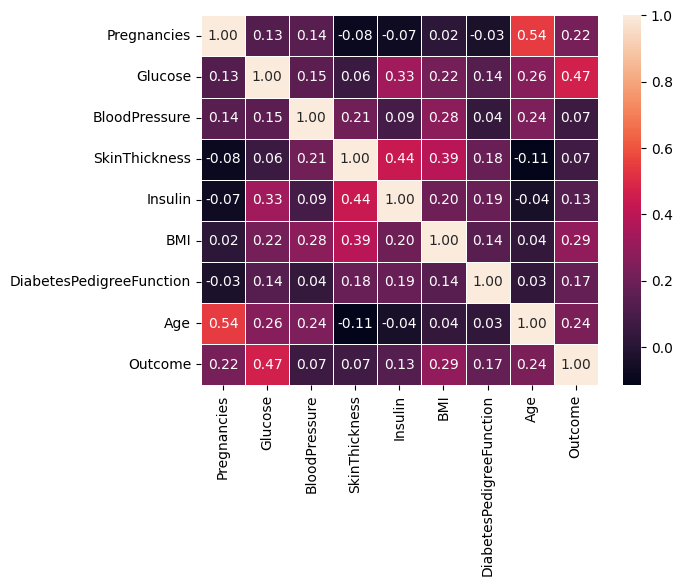

In [11]:
sns.heatmap(data.corr(),annot=True,fmt='0.2f', linewidth=.5)


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

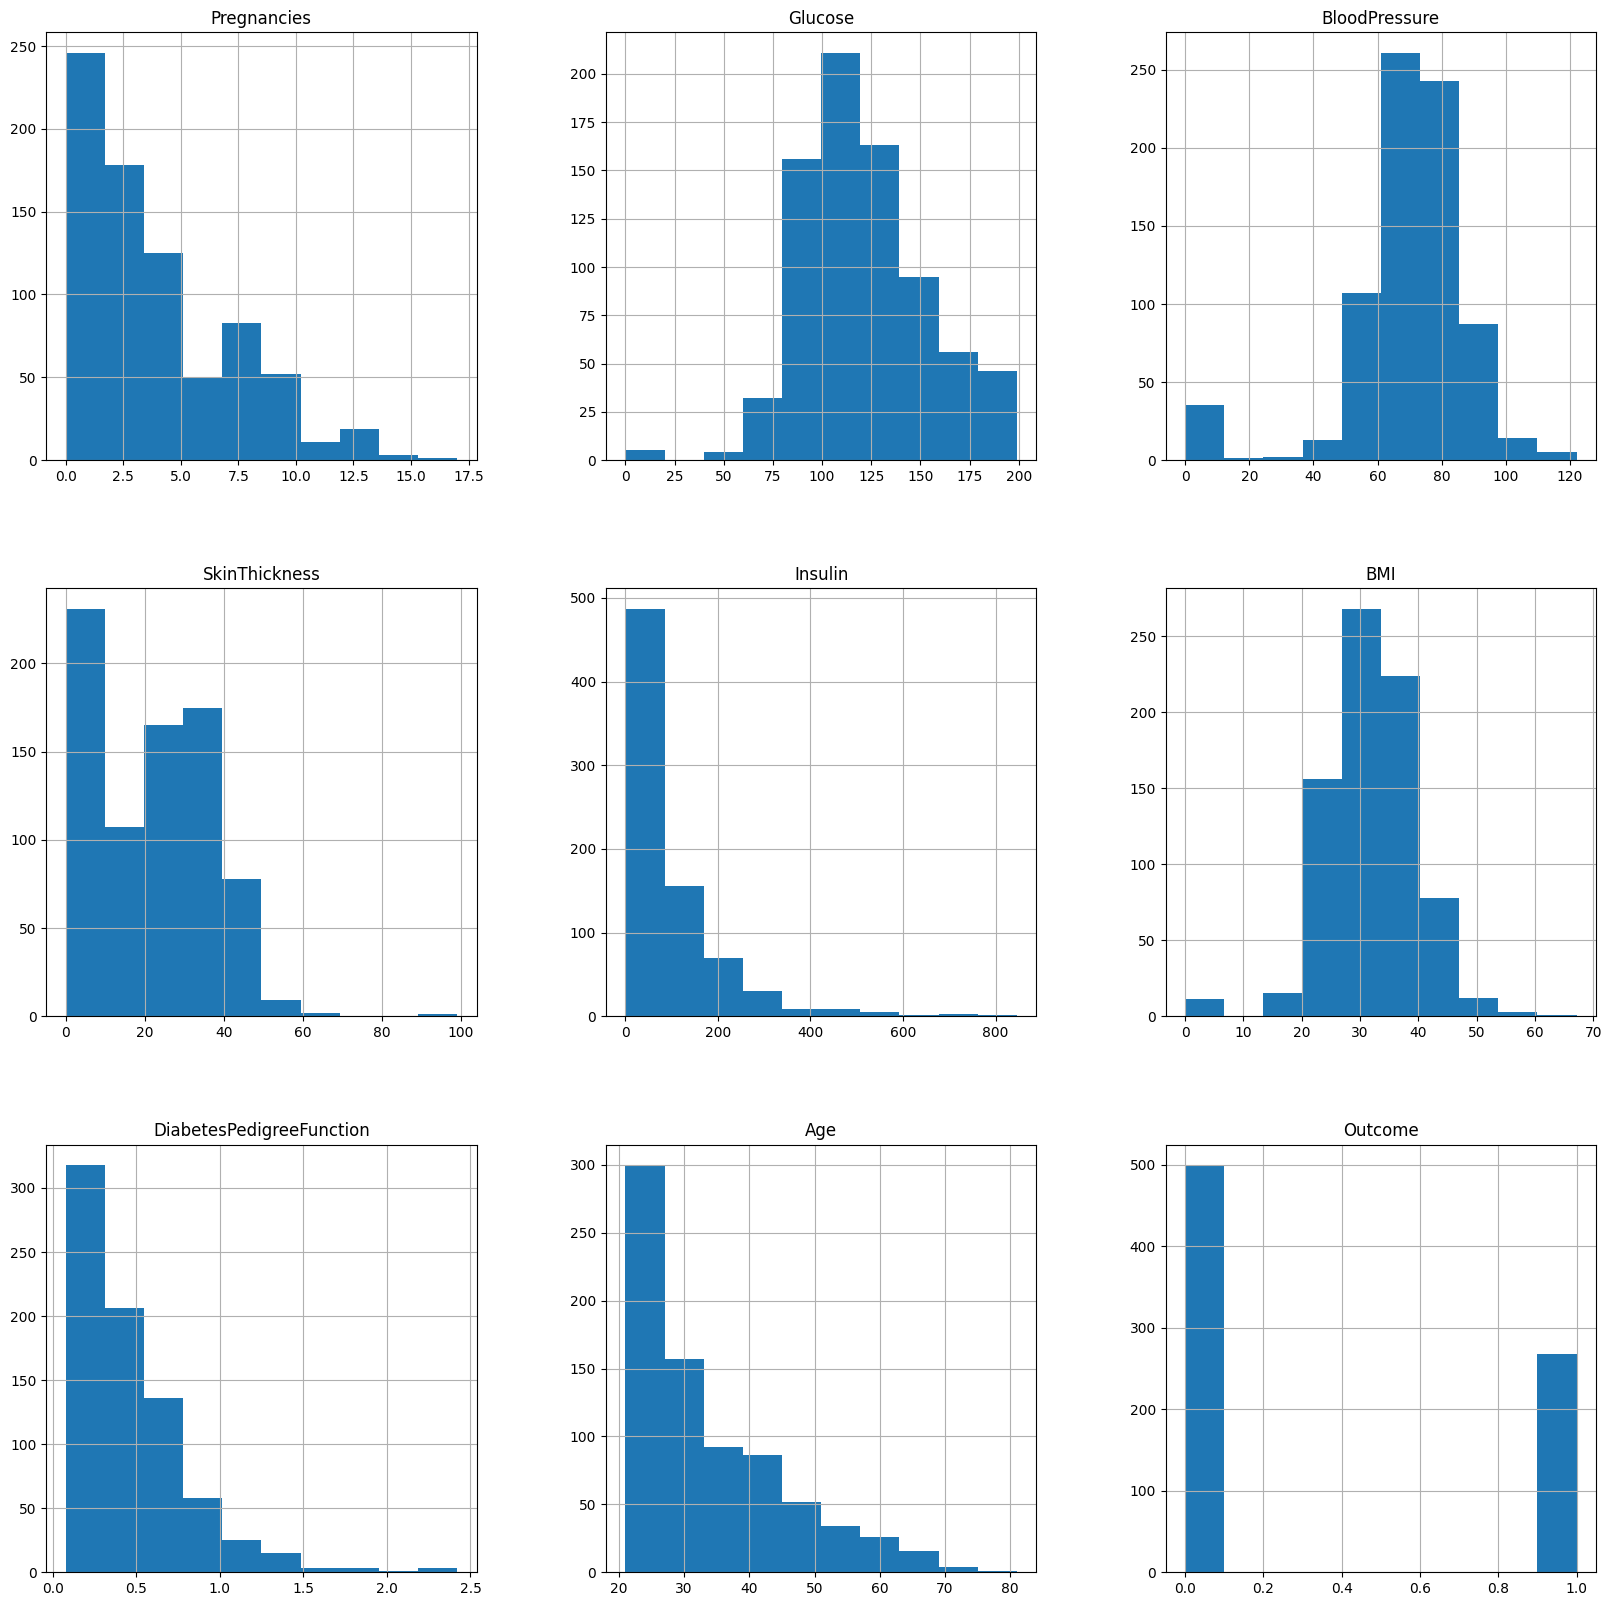

In [12]:
data.hist(figsize = (20,20))

C:\Users\sh\AppData\Local\Temp\ipykernel_12592\2990758130.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=data,palette=['g','r'])


<Axes: xlabel='Outcome', ylabel='count'>

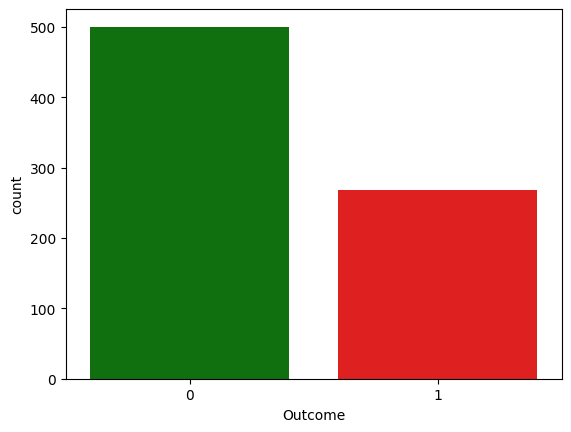

In [13]:
sns.countplot(x='Outcome',data=data,palette=['g','r'])

C:\Users\sh\AppData\Local\Temp\ipykernel_12592\1286884028.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Pregnancies" ])


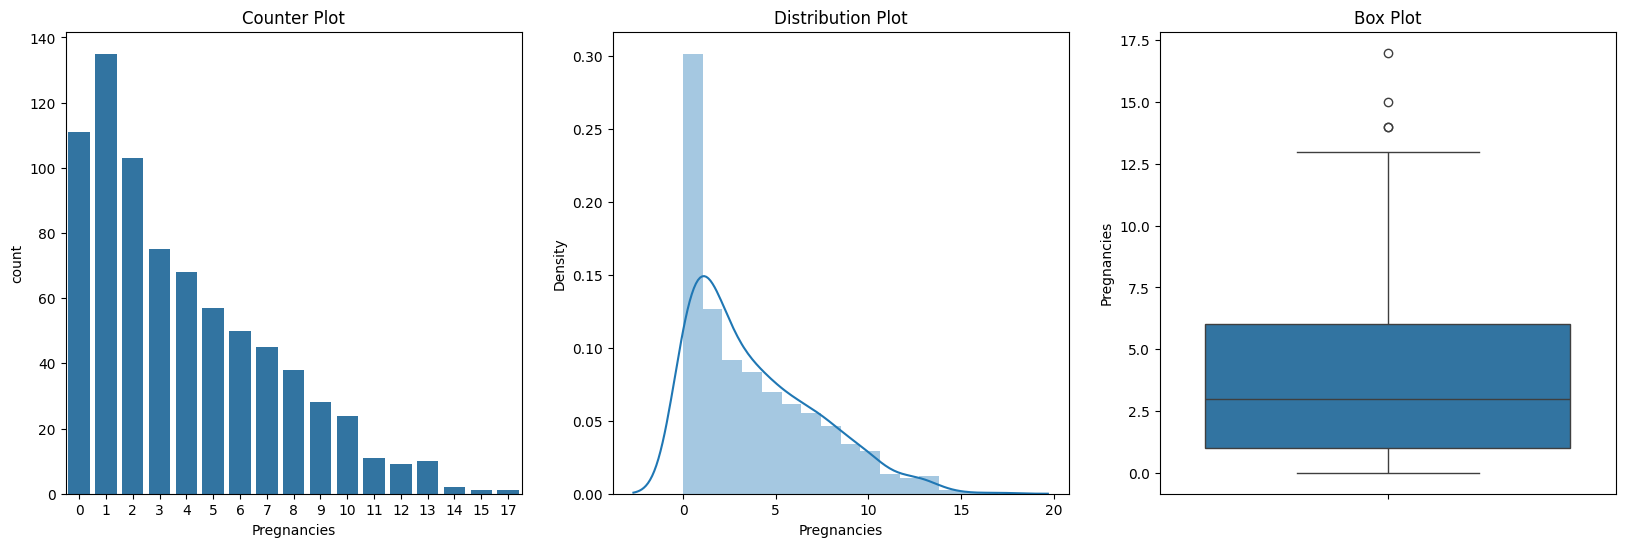

In [14]:
plt.figure(figsize=(20,6))

plt.subplot(1, 3, 1)
plt.title("Counter Plot")
sns.countplot(x = 'Pregnancies',data = data)

plt.subplot (1, 3, 2)
plt.title('Distribution Plot')
sns.distplot(data["Pregnancies" ])

plt.subplot(1, 3, 3)
plt.title('Box Plot')
sns.boxplot(y=data["Pregnancies" ] )

plt.show()


<Axes: xlabel='Age'>

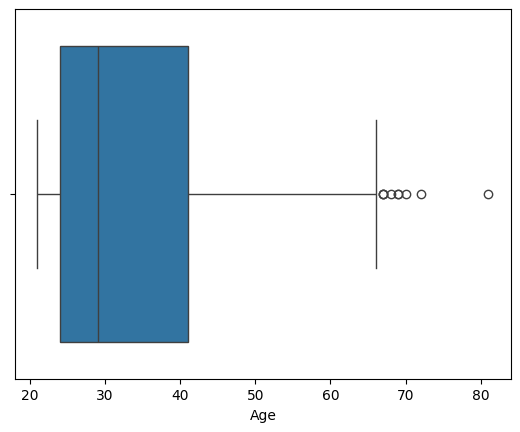

In [22]:

sns.boxplot(x = 'Age',data = data)


create model

In [ ]:
x=data.drop('Outcome', axis=1)
y=data['Outcome']


In [ ]:
rm=RandomOverSampler(random_state=41)
x_res,y_res=rm.fit_resample(x,y)




In [ ]:
print('old data set shape{}'.format(Counter(y)))
print('old data set shape{}'.format(Counter(y_res)))

old data set shapeCounter({0: 500, 1: 268})
old data set shapeCounter({1: 500, 0: 500})


In [ ]:
x_train, x_test, y_train, y_test=train_test_split (x, y, test_size=.2,random_state=41)

In [ ]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier(n_estimators=100,class_weight='balanced')
model4=GradientBoostingClassifier(n_estimators=1000)

In [ ]:
col=['LogisticRegression', 'SVC', 'RandomForestClassifier', 'GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

d:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
accuracy is : 0.7792207792207793 recall is : 0.7692307692307693 f1 is : 0.6382978723404256


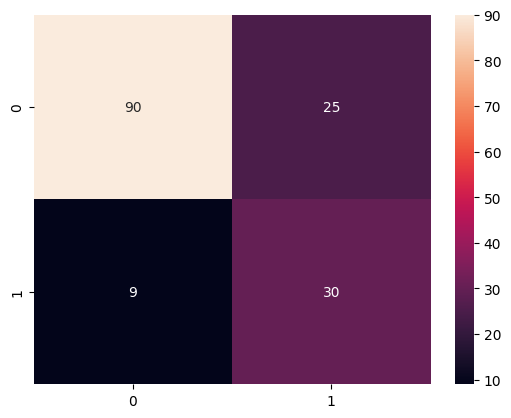

In [ ]:
def cal(model):  
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    accuracy=accuracy_score(pre,y_test)
    recall=recall_score(pre, y_test)
    f1=f1_score(pre,y_test)

    result1.append(accuracy) 
    result2.append(recall)
    result3.append(f1)

    sns.heatmap(confusion_matrix (pre,y_test) , annot=True)
    print(model)
    print('accuracy is :',accuracy, 'recall is :',recall, 'f1 is :', f1)
cal(model1)


SVC()
accuracy is : 0.7597402597402597 recall is : 0.7368421052631579 f1 is : 0.6021505376344086


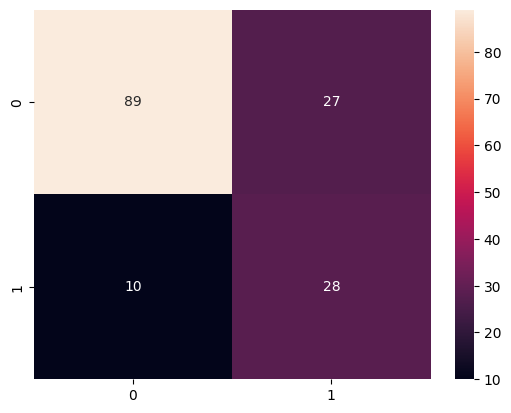

In [ ]:
cal(model2)

RandomForestClassifier(class_weight='balanced')
accuracy is : 0.7662337662337663 recall is : 0.7209302325581395 f1 is : 0.6326530612244898


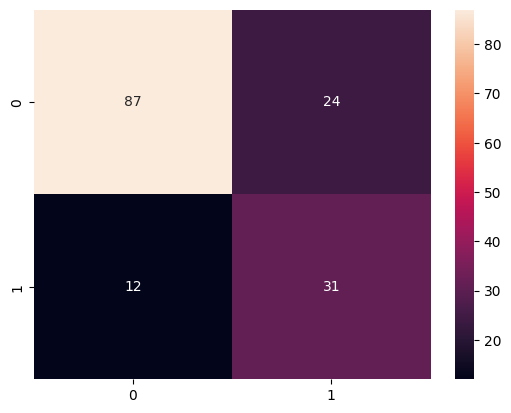

In [ ]:
cal(model3)

GradientBoostingClassifier(n_estimators=1000)
accuracy is : 0.7597402597402597 recall is : 0.6666666666666666 f1 is : 0.6605504587155964


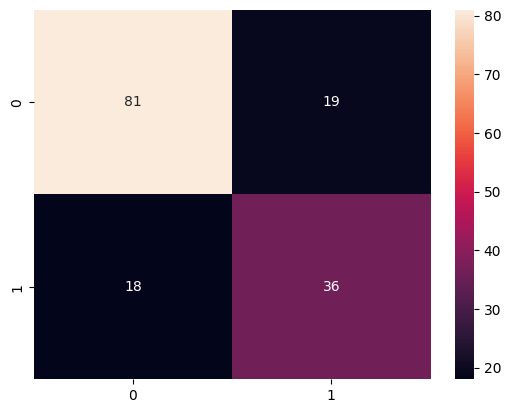

In [ ]:
cal(model4)

In [ ]:



final_result=pd.DataFrame({'Algorisms':col , 'Accuracies' :result1, 'Recal' :result2, 'F1_Score' :result3})

In [ ]:
final_result

,Algorisms,Accuracies,Recal,F1_Score
0,LogisticRegression,0.779221,0.769231,0.638298
1,SVC,0.759740,0.736842,0.602151
2,RandomForestClassifier,0.766234,0.720930,0.632653
3,GradientBoostingClassifier,0.759740,0.666667,0.660550


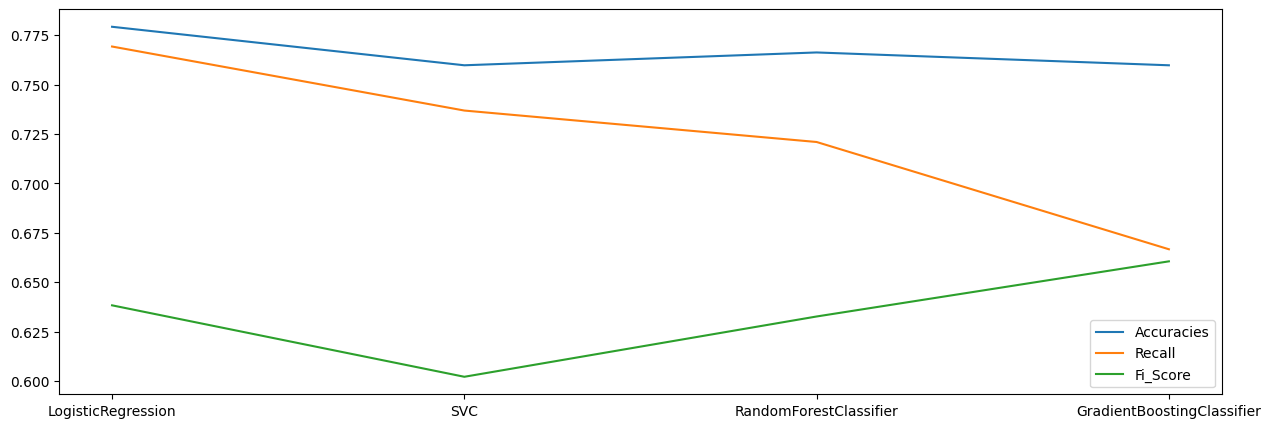

In [ ]:

fig,ax=plt.subplots(figsize=(15,5))
plt.plot(final_result.Algorisms,result1, label='Accuracies')
plt.plot(final_result.Algorisms,result2, label='Recall')
plt.plot(final_result.Algorisms,result3, label='Fi_Score')
plt.legend()
plt.show()